In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


import warnings
warnings.filterwarnings('ignore')


In [3]:
tracks = pd.read_csv('tracks_records.csv')
tracks.head()


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
tracks.shape


(170653, 19)

This is to check the information of data.Like data type of the colom

In [5]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

This is to check the sum of nullvalues of dataset foreach colom

In [6]:
tracks.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

This is for removing nan rows because we have 170653 rows if we remove sum rows also no problem.But  we dont have any nan values.If there is any nan values we can watch in bar graph.

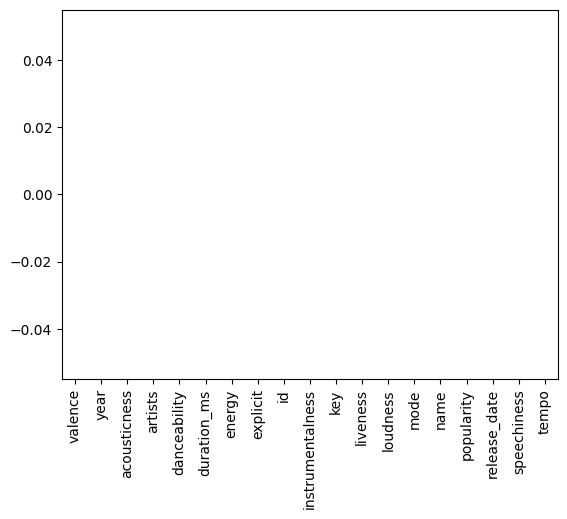

In [7]:
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()
plt.show()

In [8]:
tracks = tracks.drop(['id'], axis =1)

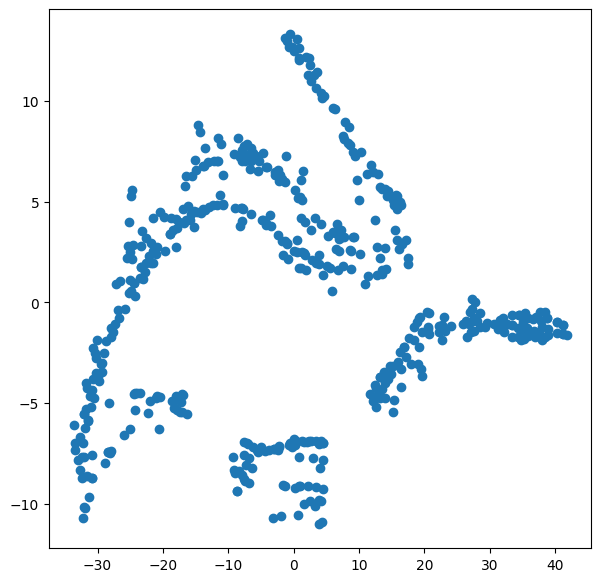

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

visual_tracks = pd.read_csv('tracks_records.csv')

# Drop rows with missing values
visual_tracks.dropna(inplace=True)

# Drop the 'id' and 'name' columns
visual_tracks.drop(columns=['id', 'name'], inplace=True)

# Initialize label encoder
label_encoder = LabelEncoder()

# Extracting and joining artists' names
visual_tracks['artists'] = visual_tracks['artists'].apply(lambda x: x.strip("[]").replace("'", ""))
artists_encoded = label_encoder.fit_transform(visual_tracks['artists'])
# Drop the original 'artists' column
visual_tracks.drop(columns=['artists'], inplace=True)

# Assign encoded artists to the dataset
visual_tracks['artists_encoded'] = artists_encoded

# Drop 'release_date' column
visual_tracks.drop(columns=['release_date'], inplace=True)

# Initialize TSNE model
model = TSNE(n_components=2, random_state=0)

# Fit and transform the data
tsne_data = model.fit_transform(visual_tracks.head(500))

# Plot the t-SNE visualization
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [10]:
tracks['name'].nunique(), tracks.shape

(133638, (170653, 18))

In [11]:
tracks = tracks.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['name'], keep='first', inplace=True)
tracks.shape

(133638, 18)

In [12]:
# plt.figure(figsize = (8, 5))
# tracks['Start Date']=pd.to_datetime(tracks['Start Date'])
# sb.countplot(tracks['release_date'])
# plt.axis('off')
# plt.show()

In [13]:
floats = []
for col in tracks.columns:
  if tracks[col].dtype == 'float':
    floats.append(col)
 
len(floats)

9

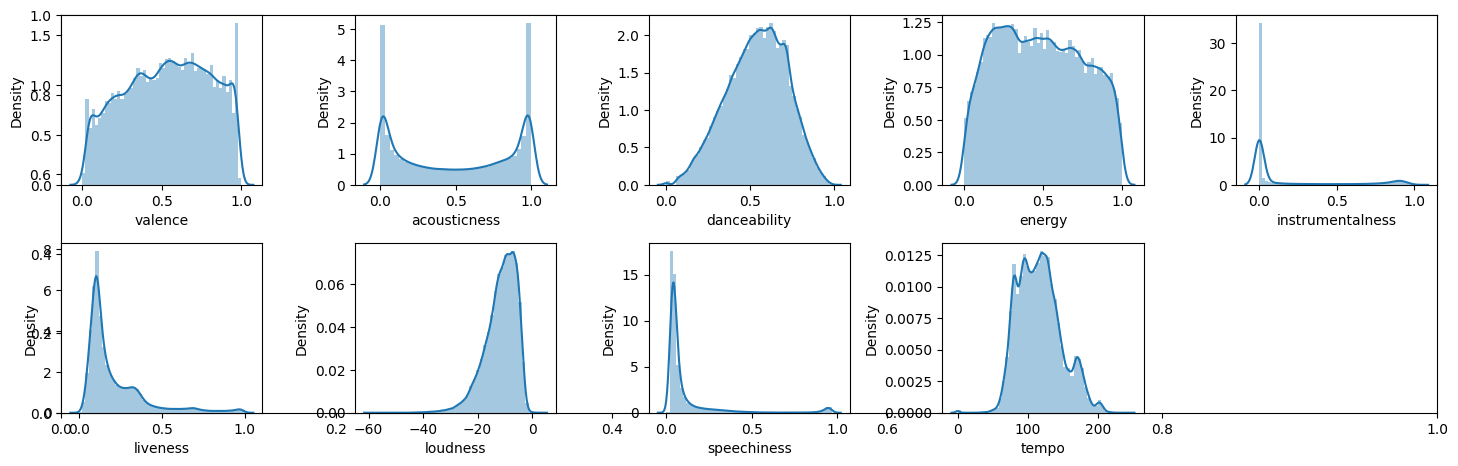

In [14]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(tracks[col])
plt.tight_layout()
plt.show()

In [15]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['name'])

In [16]:
tracks = tracks.sort_values(by=['popularity'], ascending=False).head(10000)
tracks.shape

(10000, 18)

In [17]:
def get_similarities(song_name, data):
    # Check if the input song exists in the dataset
    if song_name not in data['name'].values:
        return [0] * len(data)  # Return zero similarities if the input song is not found
    
    # Getting vector for the input song
    text_array1 = song_vectorizer.transform(data[data['name'] == song_name]['name']).toarray()
    num_array1 = data[data['name'] == song_name].select_dtypes(include=np.number).to_numpy()
   
    # Initialize similarity list
    sim = []
    
    # Iterate over each row of the dataset
    for idx, row in data.iterrows():
        name = row['name']
        
        # Skip the input song itself
        if name == song_name:
            sim.append(0)  # Set similarity to 0 for the input song
            continue
     
        # Getting vector for current song
        text_array2 = song_vectorizer.transform(data[data['name'] == name]['name']).toarray()
        num_array2 = data[data['name'] == name].select_dtypes(include=np.number).to_numpy()
 
        # Calculating similarities for text and numeric features
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        sim.append(text_sim + num_sim)
     
    return sim


In [18]:

# def get_similarities(song_name, data):
  
#   # Getting vector for the input song.
#   text_array1 = song_vectorizer.transform(data[data['name']==song_name]['name']).toarray()
#   num_array1 = data[data['name']==song_name].select_dtypes(include=np.number).to_numpy()
   
#   # We will store similarity for each row of the dataset
#   sim = []
#   for idx, row in data.iterrows():
#     name = row['name']
     
#     # Getting vector for current song.
#     text_array2 = song_vectorizer.transform(data[data['name']==name]['name']).toarray()
#     num_array2 = data[data['name']==name].select_dtypes(include=np.number).to_numpy()
 
#     # Calculating similarities for text as well as numeric features
#     text_sim = cosine_similarity(text_array1, text_array2)[0][0]
#     num_sim = cosine_similarity(num_array1, num_array2)[0][0]
#     sim.append(text_sim + num_sim)
     
#   return sim





In [19]:
def recommend_songs(song_name, data=tracks):
  # Base case
  if tracks[tracks['name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')
     
    for song in data.sample(n=5)['name'].values:
      print(song)
    return
   
  data['similarity_factor'] = get_similarities(song_name, data)
 
  data.sort_values(by=['similarity_factor', 'popularity','year'],
                   ascending = [False, False,False],
                   inplace=True)
   
  # First song will be the input song itself as the similarity will be highest.
  display(data[['name', 'artists','year']][2:10])

In [20]:
#recommend_songs('Shape of You')
recommend_songs('Love Me Like You Do')

,name,artists,year
75050,Like You Do,['Joji'],2020
124762,Let Me Love You Like A Woman,['Lana Del Rey'],2020
37551,"Love Me Like You Do - From ""Fifty Shades Of Grey""",['Ellie Goulding'],2015
56685,Tell Me You Love Me,['Demi Lovato'],2017
17866,Love You Like A Love Song,['Selena Gomez & The Scene'],2011
75049,Hate You Like I Love You,['Granger Smith'],2020
10633,Say You Love Me,['Fleetwood Mac'],1975
38335,Who Do You Love,"['The Chainsmokers', '5 Seconds of Summer']",2019


In [21]:
#recommend_songs('Love Someone')

In [22]:
#recommend_songs('Love me like you do')